In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
from typing import List, Callable
import matplotlib.pyplot as plt


In [2]:
def rec_bb(t: List, f: int, l: int, key: int) -> int:
    if f > l:
        return None
    if f == l:
        if t[f] == key:
            return f
        else:
            return None
    m = (f + l)//2

    if t[m] == key:
        return m
    elif t[m] > key:
        rec_bb(t, f, m-1, key)
    else:
        rec_bb(t, m+1, l, key)


In [3]:
def bb(t: List, f: int, l: int, key: int) -> int:
    while f <= l:
        m = (f + l)//2
        if t[m] == key:
            return m
        elif t[m] > key:
            l = m-1
        else:
            f = m+1
    return None


In [19]:
# Tets recursive
l_times = []
for i, size in enumerate(range(5, 15)):
    t = list(range(2**i * size))
    key = t[-1]
    timings = %timeit - n 100 - r 50 - o - q rec_bb(t, 0, len(t) - 1, key)
    l_times.append([len(t), timings.best])
    bb_rec_times = np.array(l_times)

l_times


[[5, 1.2540899842861109e-06],
 [12, 9.97890001599444e-07],
 [28, 1.2013200102956035e-06],
 [64, 1.658609999140026e-06],
 [144, 1.891470001282869e-06],
 [320, 2.2470899966720027e-06],
 [704, 2.3802599935152103e-06],
 [1536, 2.2901599913893734e-06],
 [3328, 2.42737998632947e-06],
 [7168, 2.6293199880456085e-06]]

In [20]:
# Test iterative
l_times = []
for i, size in enumerate(range(5, 15)):
    t = list(range(2**i * size))
    key = t[-1]
    timings = %timeit - n 100 - r 50 - o - q bb(t, 0, len(t) - 1, key)
    l_times.append([len(t), timings.best])
    bb_times = np.array(l_times)

l_times


[[5, 6.412399852706585e-07],
 [12, 8.392299969273154e-07],
 [28, 1.0024599941971245e-06],
 [64, 1.2584599971887655e-06],
 [144, 1.39575999128283e-06],
 [320, 1.633989995752927e-06],
 [704, 1.776509998308029e-06],
 [1536, 1.8761799947242252e-06],
 [3328, 1.857089991972316e-06],
 [7168, 1.8188600006396882e-06]]

# Apartado 3

In [6]:
def fit_func_2_times(timings: np.ndarray):
    """Ajusta linealmente los valores de la funcion func_2_fit a
    los tiempos en timings.
    Esto es, calculamos valores a, b para que la funcion a*f(dim) + b
    se ajuste a los tiempos medidos.
    """
    if len(timings.shape) == 1:
        timings = timings.reshape(-1, 1)

    values = func_2_fit(timings[:, 0]).reshape(-1, 1)

    # normalizar timings
    times = timings[:, 1] / timings[0, 1]

    # ajustar a los valores en times un modelo lineal sobre los valores en values
    lr_m = LinearRegression()
    lr_m.fit(values, times)

    return lr_m.predict(values)


def func_2_fit(n):
    return n


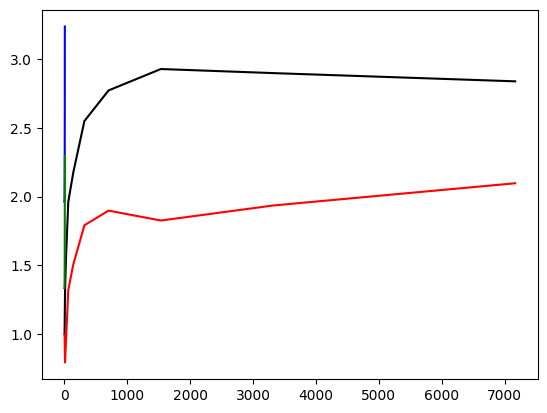

In [24]:
bb_predict = fit_func_2_times(bb_times)
bb_rec_predict = fit_func_2_times(bb_rec_times)

bb_eje_x = bb_times[:, 0]
bb_eje_y = bb_times[:, 1] / bb_times[0, 1]

bb_rec_eje_x = bb_rec_times[:, 0]
bb_rec_eje_y = bb_rec_times[:, 1] / bb_rec_times[0, 1]


plt.plot(bb_eje_x, bb_eje_y, color="black")
plt.plot(bb_rec_eje_x, bb_rec_eje_y, color="red")

plt.plot(bb_predict, color="blue")
plt.plot(bb_rec_predict, color="green")

plt.show()
